In [3]:
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

import pandas as pd
import matplotlib.pyplot as plt
import typing as tp
import tensorflow as tf

In [4]:
## gather
x = tf.constant([1, 2, 3, 4, 5, 6])
y = tf.constant([5, 2, 3])
tf.gather(x, y).numpy()


array([6, 3, 4], dtype=int32)

In [5]:
## scatter
pos = tf.constant([[2], [4], [6]])
values = tf.constant([8, 10, 3])
tf.scatter_nd(pos, values, shape=(10, )).numpy()

array([ 0,  0,  8,  0, 10,  0,  3,  0,  0,  0], dtype=int32)

In [6]:
def generate_random_binary_mask(size: int, thr: float = 0.5) -> tf.Tensor:
    mask = tf.random.uniform(shape=(1, size, size), dtype=tf.float32)
    return mask < thr
    

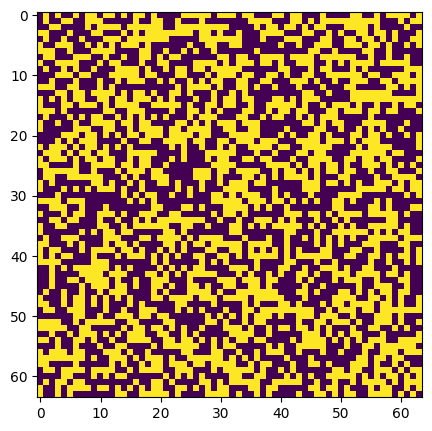

In [7]:
plt.figure(figsize=(5, 5))

mask = generate_random_binary_mask(64)

plt.imshow(mask[0, :, :].numpy())
plt.show()

# plt.figure(figsize=(5, 5))

In [8]:
import importlib 
import connected_components_task

importlib.reload(connected_components_task)

<module 'connected_components_task' from '/home/al_ivanov/exp/connected_components_task.py'>

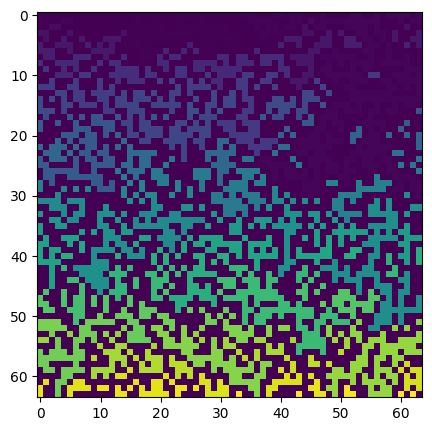

In [9]:
plt.figure(figsize=(5, 5))

cc = connected_components_task.custom_connected_components(mask)

plt.imshow(cc[0, :, :].numpy())
plt.show()

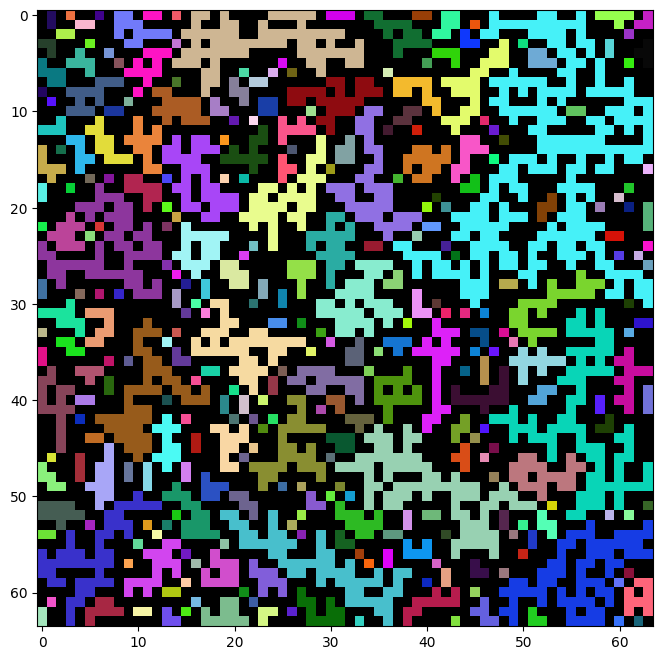

In [10]:
## Выше как-то некрасиво получилось, давайте попробуем превратить номера компонент в некоторые тройки числе от 0 о 255, чтобы получить красивое RGB представление


def visualize(cc):
    red_mapping = tf.cast(tf.random.shuffle(tf.range(0, 256), seed=42), tf.int64)
    green_mapping = tf.cast(tf.random.shuffle(tf.range(0, 256), seed=42), tf.int64)
    blue_mapping = tf.cast(tf.random.shuffle(tf.range(0, 256), seed=42), tf.int64)
    
    red_channel = tf.where(cc != 0, tf.gather(red_mapping, ((cc + cc // 279) * 73 % 256)), cc)
    green_channel = tf.where(cc != 0, tf.gather(red_mapping, ((cc + cc // 319) * 133 % 256)), cc)
    blue_channel = tf.where(cc != 0, tf.gather(red_mapping, ((cc + cc // 517) * 191 % 256)), cc)
    
    joined = tf.stack([red_channel, blue_channel, green_channel], axis=-1)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(joined[0, :, :].numpy())
    plt.show()

visualize(cc)

# Разберитесь с функцией, поймите, что в ней произошло и почему рисунок получился такой достаточно красивый